In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
customers = pd.read_excel('E-commerce_data.xlsx', sheet_name='customers')
genders = pd.read_excel('E-commerce_data.xlsx', sheet_name='genders')
cities = pd.read_excel('E-commerce_data.xlsx', sheet_name='cities')
transactions = pd.read_excel('E-commerce_data.xlsx', sheet_name='transactions')

In [22]:
df = pd.merge(customers, genders, on='gender_id')
df = pd.merge(df, cities, on='city_id')
df = pd.merge(df, transactions, on='customer_id')


In [23]:
df.head()

,customer_id,join_date,city_id,gender_id,gender_name,city_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,2022-01-08,7,1,Male,Mansoura,178,2022-07-30,subscribed,SrP-866,NaT,8
1,1,2022-01-08,7,1,Male,Mansoura,257,2022-09-19,burned,krI-075,2022-11-05,1
2,1,2022-01-08,7,1,Male,Mansoura,1652,2022-06-09,burned,quk-137,2022-07-19,6
3,1,2022-01-08,7,1,Male,Mansoura,1929,2022-07-30,burned,QiG-754,2022-10-18,8
4,1,2022-01-08,7,1,Male,Mansoura,2352,2023-03-24,subscribed,OtC-985,NaT,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5000 non-null   int64         
 1   join_date           5000 non-null   datetime64[ns]
 2   city_id             5000 non-null   int64         
 3   gender_id           5000 non-null   int64         
 4   gender_name         5000 non-null   object        
 5   city_name           5000 non-null   object        
 6   transaction_id      5000 non-null   int64         
 7   transaction_date    5000 non-null   datetime64[ns]
 8   transaction_status  5000 non-null   object        
 9   coupon_name         5000 non-null   object        
 10  burn_date           2516 non-null   datetime64[ns]
 11  branch_id           5000 non-null   int64         
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 468.9+ KB


In [25]:
df['coupon_usage_frequency'] = df.groupby('customer_id')['coupon_name'].transform('count')

In [28]:
df2 = df[["gender_name", "city_name", "transaction_status", "coupon_usage_frequency"]].copy()

## Data Preprocessing:

In [29]:
cols_cat = ["gender_name", "city_name", "transaction_status"]
for i in cols_cat:
    df2[i] = LabelEncoder().fit_transform(df2[i])

In [30]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['coupon_usage_frequency']])

In [31]:
df2.head()

,gender_name,city_name,transaction_status,coupon_usage_frequency
0,1,11,1,7
1,1,11,0,7
2,1,11,0,7
3,1,11,0,7
4,1,11,1,7


## Clustering

In [33]:
model = KMeans(3)
df2['cluster'] = model.fit_predict(df2)
df2.head()

,gender_name,city_name,transaction_status,coupon_usage_frequency,cluster
0,1,11,1,7,2
1,1,11,0,7,2
2,1,11,0,7,2
3,1,11,0,7,2
4,1,11,1,7,2


In [34]:
df2["cluster"].value_counts()

cluster
0    1761
1    1738
2    1501
Name: count, dtype: int64

In [35]:
model.inertia_

46219.177772885974

In [38]:
silhouette_score(df2, df2['cluster'])

0.42675145108444484

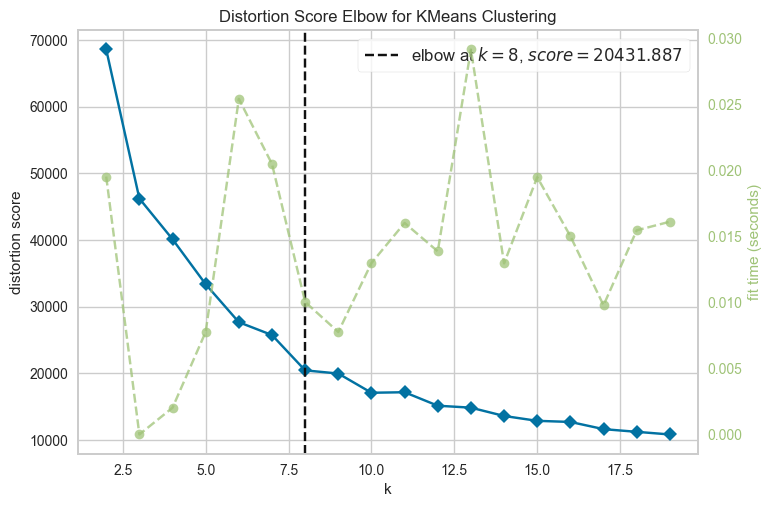

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,20))
visualizer.fit(df2.drop('cluster', axis=1))
visualizer.show()